- Pregnancies: Number of times pregnant
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- BloodPressure: Diastolic blood pressure (mm Hg)
- SkinThickness: Triceps skin fold thickness (mm)
- Insulin: 2-Hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction: A function that determines the risk of type 2 diabetes based on family history, the larger the function, the higher the risk of type 2 diabetes.
- Age: Age (years)
- Outcome: Class variable (0 or 1)

In [243]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import scipy as sp
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statistics as st
from sklearn.preprocessing import StandardScaler
from bioinfokit.analys import stat
import scikit_posthocs as sp
import plotly.express as px

In [107]:
df = pd.read_csv("diabetes.csv")
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [108]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

<AxesSubplot:>

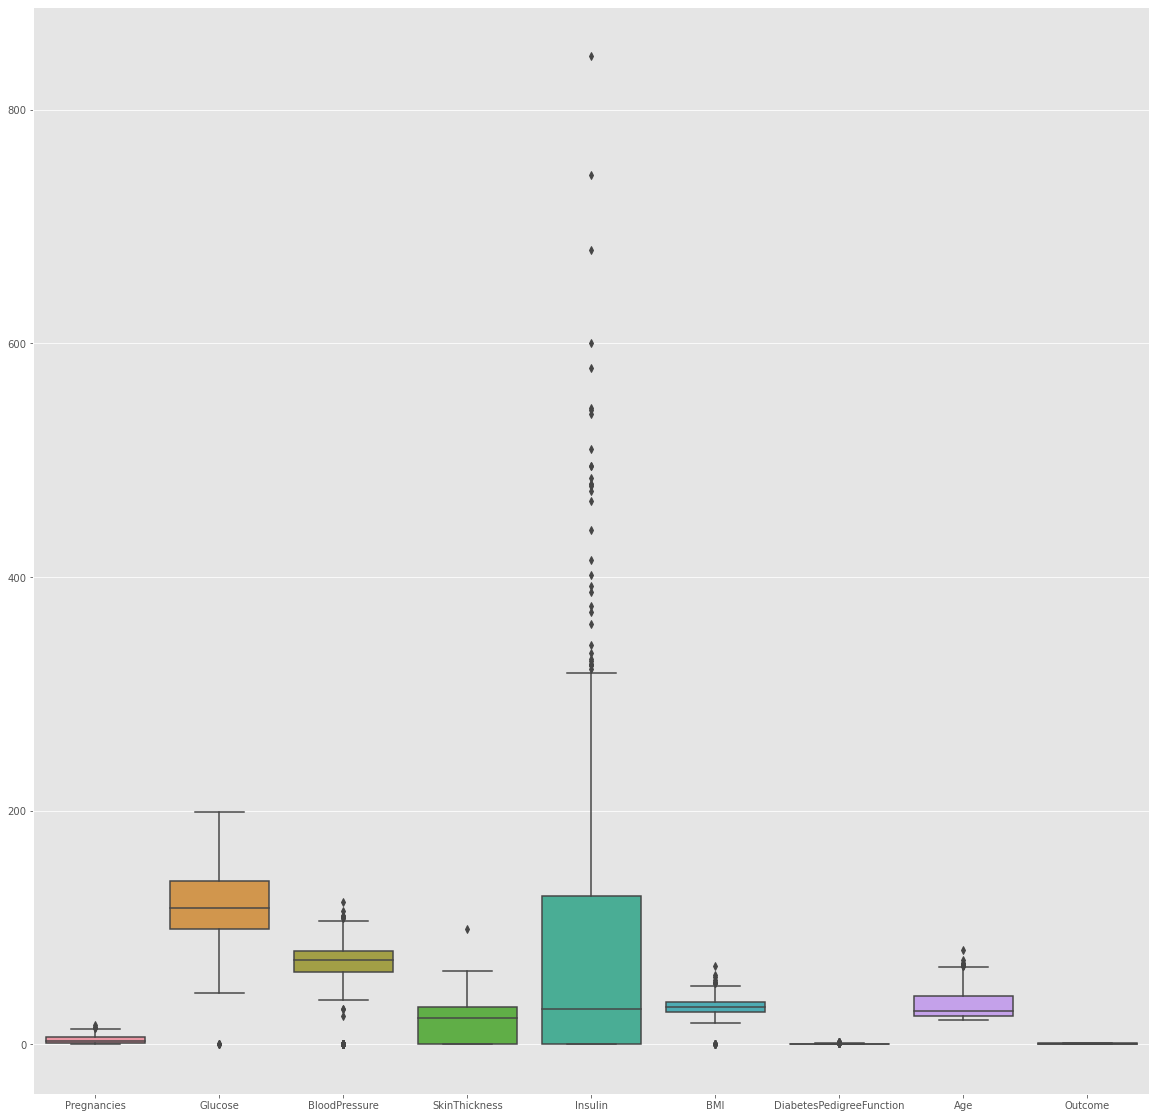

In [109]:
# Checking for outliers using a boxplot
fig , ax = plt.subplots(figsize = (20,20))
sns.boxplot(data = df, ax = ax)

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

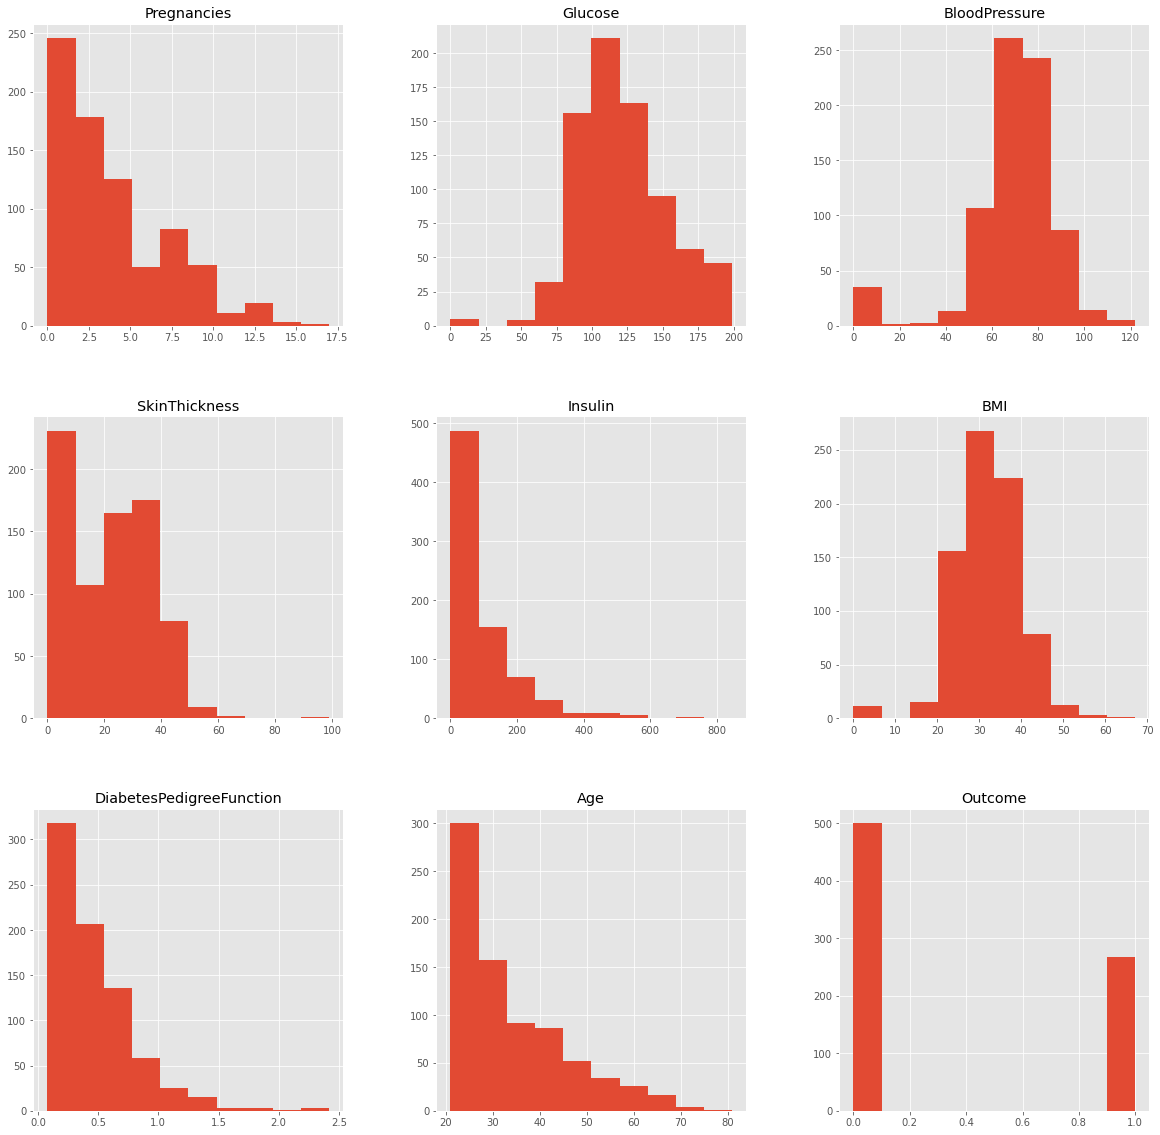

In [110]:
df.hist(figsize = (20,20))

/Users/brandonlaw/opt/anaconda3/envs/ds/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/Users/brandonlaw/opt/anaconda3/envs/ds/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/Users/brandonlaw/opt/anaconda3/envs/ds/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpret

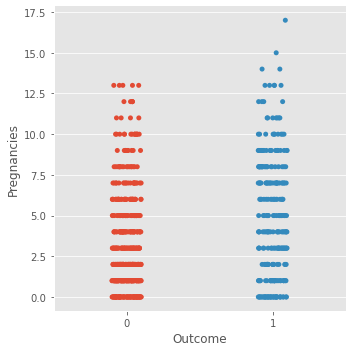

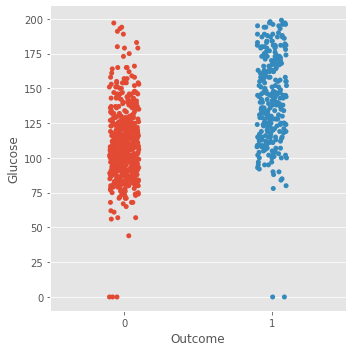

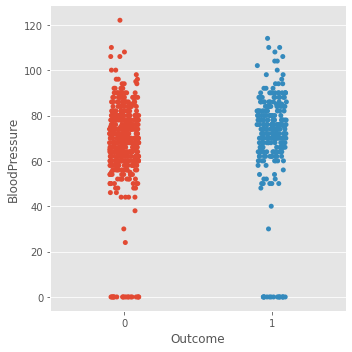

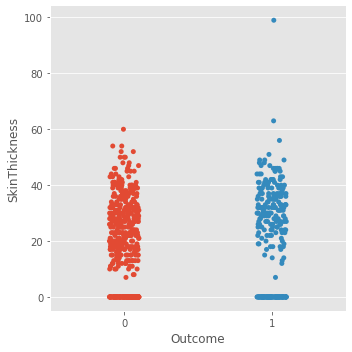

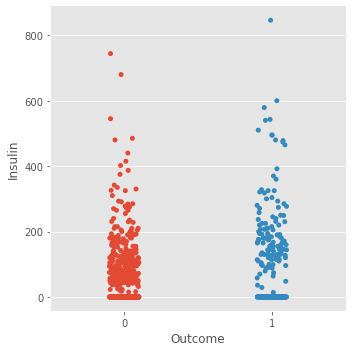

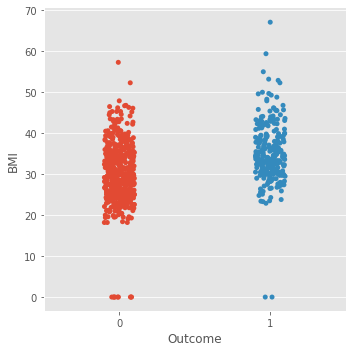

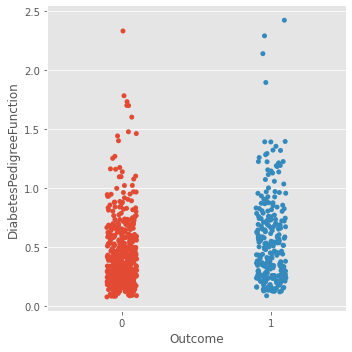

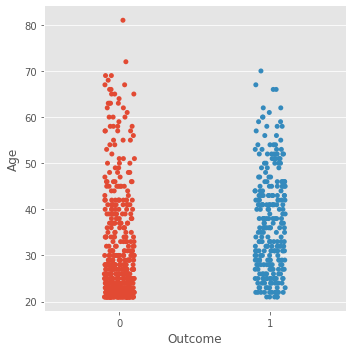

In [111]:
for col in df.columns:
    if col != "Outcome":
        sns.catplot("Outcome", col, data = df)

In [112]:
st.variance(df['Insulin'], xbar=None)

13281.180077955236

In [113]:
st.variance(df['Glucose'], xbar=None)

1022.2483142519557

In [114]:
st.variance(df['BloodPressure'], xbar=None)

374.6472712271838

In [115]:
st.variance(df['BMI'], xbar=None)

62.15998395738266

In [116]:
df.eq(0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# 1. Data Cleaning

### 1.1 Replacing zero values with Null

In [118]:
# Replace the zero values with Null: Glucose, BloodPressure, SkinThickness, Insulin, BMI
null_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for i in null_cols:
    df[i]=df[i].replace(0, np.nan)

In [119]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  763.000000     733.000000     541.000000  394.000000   
mean      3.845052  121.686763      72.405184      29.153420  155.548223   
std       3.369578   30.535641      12.382158      10.476982  118.775855   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.000000      64.000000      22.000000   76.250000   
50%       3.000000  117.000000      72.000000      29.000000  125.000000   
75%       6.000000  141.000000      80.000000      36.000000  190.000000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  757.000000                768.000000  768.000000  768.000000  
mean    32.457464                  0.471876   33.240885    0.348958  
std      6.924988                  0.331329   11.760232    0.476951  
min     18.200000                  0.078000   21.000000    0.000000  
25%     27.500000                  0.243750   24.000000    0.000000  
50%     32.300000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [120]:
# sns.displot(
#     df, x="flipper_length_mm", col="species", row="sex",
#     binwidth=3, height=3, facet_kws=dict(margin_titles=True),
# )

### 1.2 Replacing null values with median based on outcome.

In [121]:
# Function: calculate the median value of each column while excluding the null values
def median_target(var):   
    med_result = df[df[var].notnull()]
    med_result = med_result[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return med_result

In [122]:
# Loop through the columns and replace the null values with the median value based on the Outcome
for i in null_cols:
    result = median_target(i)
    df.loc[(df['Outcome'] == 0 ) & (df[i].isnull()), i] = result[i].where(result['Outcome'] == 0)[0]
    df.loc[(df['Outcome'] == 1 ) & (df[i].isnull()), i] = result[i].where(result['Outcome'] == 1)[1]

In [123]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    169.5  33.6   
1            1     85.0           66.0           29.0    102.5  26.6   
2            8    183.0           64.0           32.0    169.5  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [124]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.677083      72.389323      29.089844  141.753906   
std       3.369578   30.464161      12.106039       8.890820   89.100847   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      25.000000  102.500000   
50%       3.000000  117.000000      72.000000      28.000000  102.500000   
75%       6.000000  140.250000      80.000000      32.000000  169.500000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.434635                  0.471876   33.240885    0.348958  
std      6.880498                  0.331329   11.760232    0.476951  
min     18.200000                  0.078000   21.000000    0.000000  
25%     27.500000                  0.243750   24.000000    0.000000  
50%     32.050000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [125]:
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.10)
    quartile3 = dataframe[variable].quantile(0.90)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [126]:
def replace_with_thresholds(dataframe, numeric_columns):
    for variable in numeric_columns:
        low_limit, up_limit = outlier_thresholds(dataframe, variable)
        dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
        dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [127]:
replace_with_thresholds(df, df.columns)

In [128]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.677083      72.389323      29.055990  138.839844   
std       3.369578   30.464161      12.106039       8.671056   75.233052   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      25.000000  102.500000   
50%       3.000000  117.000000      72.000000      28.000000  102.500000   
75%       6.000000  140.250000      80.000000      32.000000  169.500000   
max      17.000000  199.000000     122.000000      73.000000  424.500000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.434635                  0.470082   33.240885    0.348958  
std      6.880498                  0.322171   11.760232    0.476951  
min     18.200000                  0.078000   21.000000    0.000000  
25%     27.500000                  0.243750   24.000000    0.000000  
50%     32.050000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  1.949000   81.000000    1.000000

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

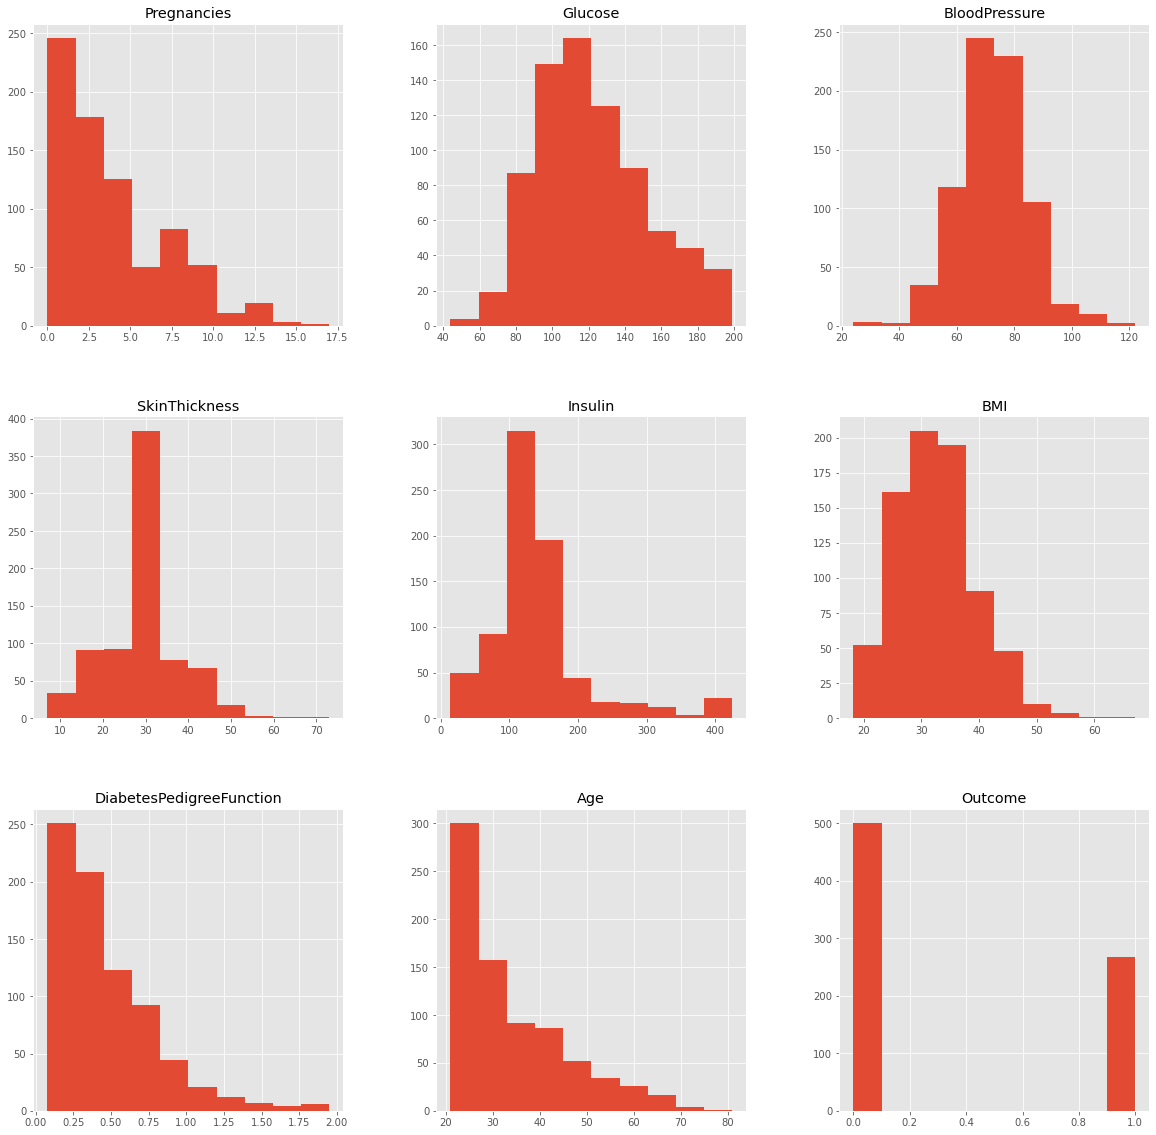

In [129]:
df.hist(figsize = (20,20))

In [130]:
print(df['Insulin'].quantile(0.95))

293.0


In [131]:
# https://www.statology.org/10-percent-condition/
df[df['Insulin'] > df['Insulin'].quantile(0.90)].count()

Pregnancies                 75
Glucose                     75
BloodPressure               75
SkinThickness               75
Insulin                     75
BMI                         75
DiabetesPedigreeFunction    75
Age                         75
Outcome                     75
dtype: int64

In [132]:
# Previous variance was 13281.180077955236
st.variance(df['Insulin'], xbar=None)

5660.012126181551

In [133]:
# Correlation before filling in missing values.
corr = df.corr()
corr['Outcome'].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.495990
Insulin                     0.423696
BMI                         0.315577
SkinThickness               0.297281
Age                         0.238356
Pregnancies                 0.221898
BloodPressure               0.174469
DiabetesPedigreeFunction    0.174398
Name: Outcome, dtype: float64

### 1.3 Glucose/Insulin Ratio

In [134]:
# df['GIRatio'] = df['Glucose'] / df['Insulin']
# df.head()

# 2. EDA

### 2.1 Heatmap

<AxesSubplot:>

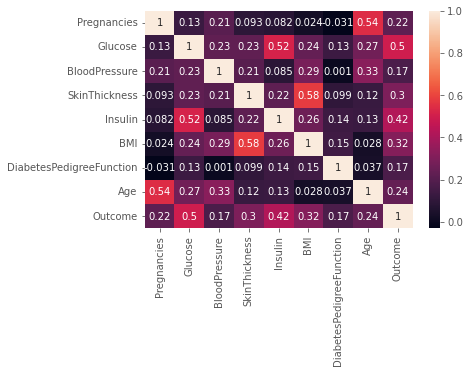

In [135]:
# Excluding the null values, understand the correlation between the variables
corr = df.corr()
# print(corr)
sns.heatmap(corr, annot=True,
         xticklabels=corr.columns, 
         yticklabels=corr.columns)

### 2.2 Boxplots

<AxesSubplot:>

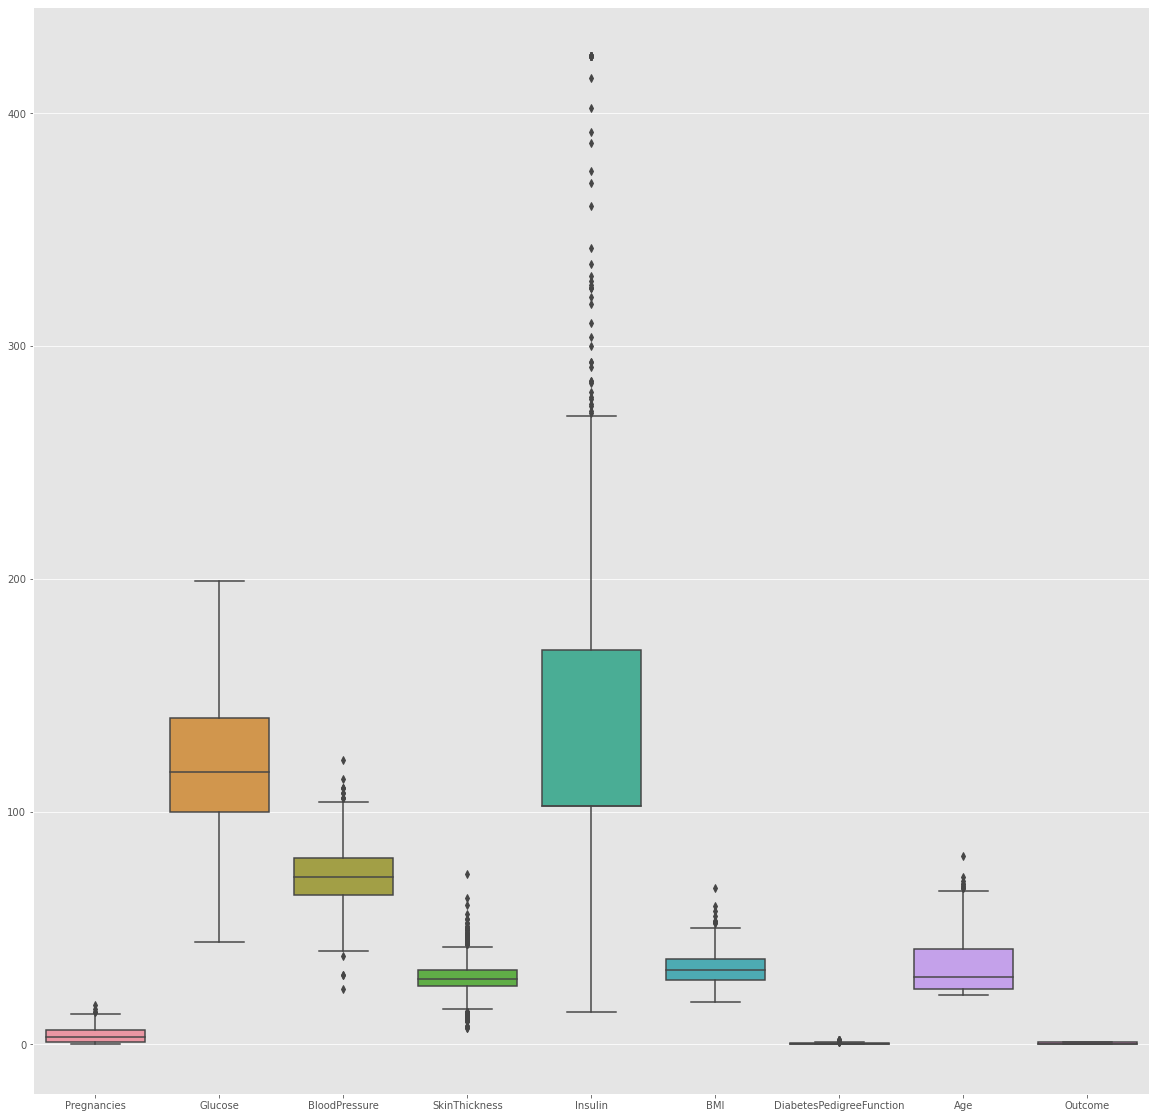

In [136]:
# Checking for outliers using a boxplot
fig , ax = plt.subplots(figsize = (20,20))
sns.boxplot(data = df, ax = ax)

### Since there are a lot of outliers, checking for normal distribution.

/Users/brandonlaw/opt/anaconda3/envs/ds/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



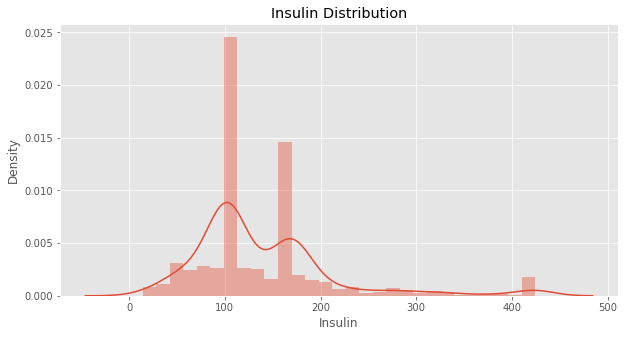

In [137]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.title('Insulin Distribution')
sns.distplot(df['Insulin'])
plt.show()

/Users/brandonlaw/opt/anaconda3/envs/ds/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



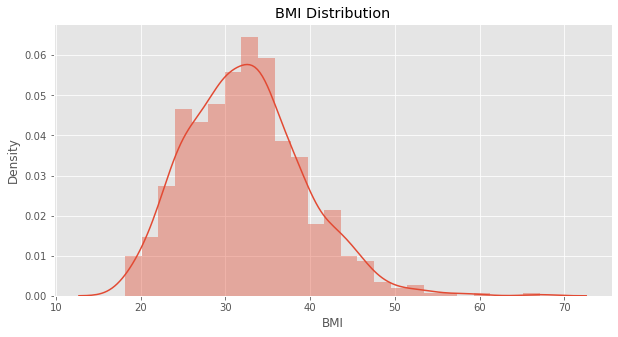

In [138]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.title('BMI Distribution')
sns.distplot(df['BMI'])
plt.show()

/Users/brandonlaw/opt/anaconda3/envs/ds/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



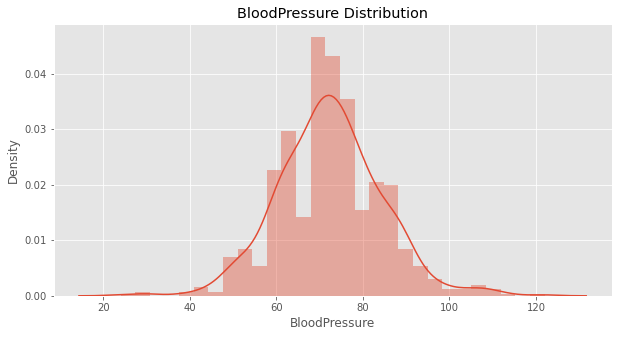

In [139]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.title('BloodPressure Distribution')
sns.distplot(df['BloodPressure'])
plt.show()

/Users/brandonlaw/opt/anaconda3/envs/ds/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



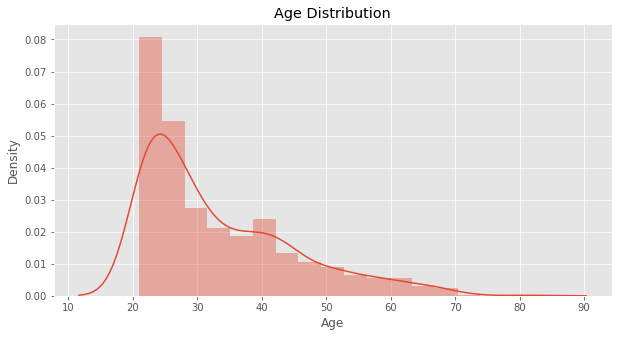

In [140]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.title('Age Distribution')
sns.distplot(df['Age'])
plt.show()

/Users/brandonlaw/opt/anaconda3/envs/ds/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



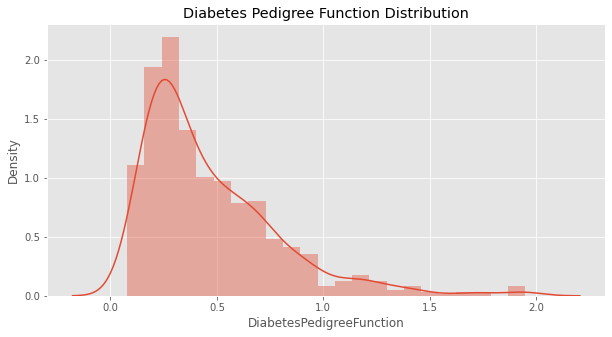

In [141]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.title('Diabetes Pedigree Function Distribution')
sns.distplot(df['DiabetesPedigreeFunction'])
plt.show()

/Users/brandonlaw/opt/anaconda3/envs/ds/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



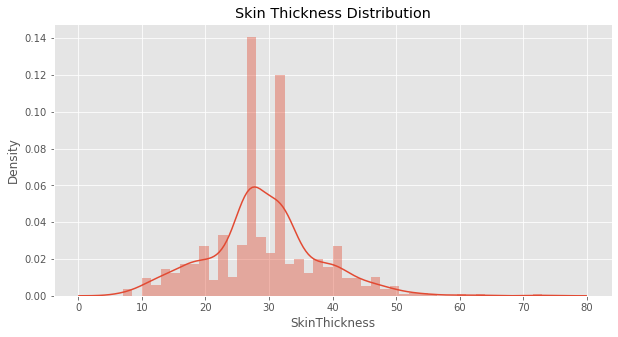

In [142]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.title('Skin Thickness Distribution')
sns.distplot(df['SkinThickness'])
plt.show()

/Users/brandonlaw/opt/anaconda3/envs/ds/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



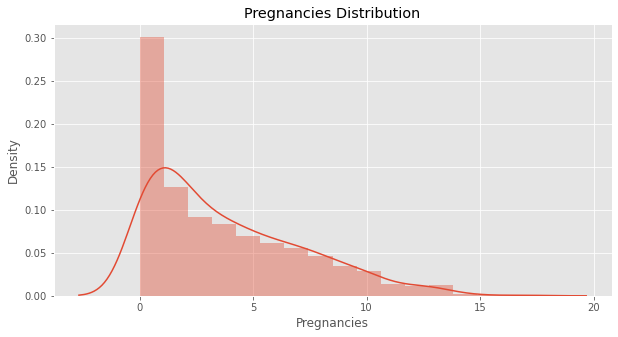

In [143]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.title('Pregnancies Distribution')
sns.distplot(df['Pregnancies'])
plt.show()

/Users/brandonlaw/opt/anaconda3/envs/ds/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



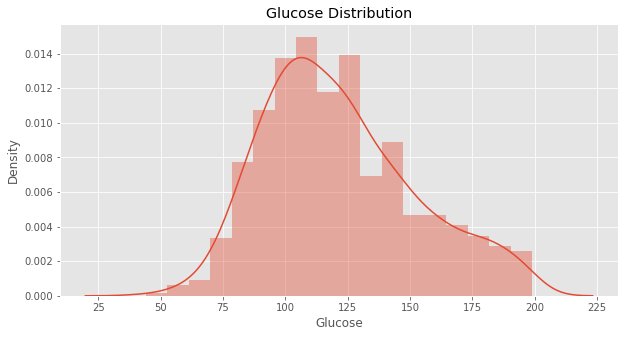

In [144]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.title('Glucose Distribution')
sns.distplot(df['Glucose'])
plt.show()

In [145]:
# sns.pairplot(df, hue="Outcome")

## 2.4 T-Tests
- Between the mean of insulin? glucose? bmi? between diabetic and non-diabetic

In [146]:
a = df[df['Outcome'] == 0].iloc[:, :8]
b = df[df['Outcome'] == 1][:7].iloc[:, :8]
tValue, pValue = stats.ttest_ind(a, b, equal_var=False)
print("P-Value:{0} T-Statistic:{1}".format(pValue,tValue))

P-Value:[0.20428963 0.04811245 0.55460282 0.00520612 0.09785596 0.3213479
 0.41758893 0.08406133] T-Statistic:[-1.42089017 -2.4688191   0.62517464 -4.10989886 -1.95502887 -1.07781651
 -0.86989883 -2.0574339 ]


In [147]:
a = df[df['Outcome'] == 0]['Pregnancies']
b = df[df['Outcome'] == 1]['Pregnancies']
tValue, pValue = stats.ttest_ind(a, b, equal_var=False)
print("P-Value:{0} T-Statistic:{1}".format(pValue,tValue))

P-Value:6.821925600457145e-09 T-Statistic:-5.9069614794974905


In [148]:
a = df[df['Outcome'] == 0]['Glucose']
b = df[df['Outcome'] == 1]['Glucose']
tValue, pValue = stats.ttest_ind(a, b, equal_var=False)
print("P-Value:{0} T-Statistic:{1}".format(pValue,tValue))  

P-Value:8.301766379086688e-42 T-Statistic:-14.992112521284481


In [149]:
a = df[df['Outcome'] == 0]['BloodPressure']
b = df[df['Outcome'] == 1]['BloodPressure']
tValue, pValue = stats.ttest_ind(a, b, equal_var=False)
print("P-Value:{0} T-Statistic:{1}".format(pValue,tValue))

P-Value:1.2399305356534365e-06 T-Statistic:-4.904107867720805


In [150]:
a = df[df['Outcome'] == 0]['SkinThickness']
b = df[df['Outcome'] == 1]['SkinThickness']
tValue, pValue = stats.ttest_ind(a, b, equal_var=False)
print("P-Value:{0} T-Statistic:{1}".format(pValue,tValue))

P-Value:1.1281106347673518e-17 T-Statistic:-8.83839391829452


In [151]:
a = df[df['Outcome'] == 0]['Insulin']
b = df[df['Outcome'] == 1]['Insulin']
tValue, pValue = stats.ttest_ind(a, b, equal_var=False)
print("P-Value:{0} T-Statistic:{1}".format(pValue,tValue))

P-Value:1.0187213148061191e-31 T-Statistic:-12.574106105720785


In [152]:
a = df[df['Outcome'] == 0]['BMI']
b = df[df['Outcome'] == 1]['BMI']
tValue, pValue = stats.ttest_ind(a, b, equal_var=False)
print("P-Value:{0} T-Statistic:{1}".format(pValue,tValue))

P-Value:1.0174261615755116e-18 T-Statistic:-9.166799372490875


In [153]:
a = df[df['Outcome'] == 0]['DiabetesPedigreeFunction']
b = df[df['Outcome'] == 1]['DiabetesPedigreeFunction']
tValue, pValue = stats.ttest_ind(a, b, equal_var=False)
print("P-Value:{0} T-Statistic:{1}".format(pValue,tValue))

P-Value:4.704699870236968e-06 T-Statistic:-4.632078137279565


In [154]:
a = df[df['Outcome'] == 0]['Age']
b = df[df['Outcome'] == 1]['Age']
tValue, pValue = stats.ttest_ind(a, b, equal_var=False)
print("P-Value:{0} T-Statistic:{1}".format(pValue,tValue))

P-Value:1.2015125273113395e-11 T-Statistic:-6.92073837898804


## 2.5 Categorization

### Categorizing BMI levels

In [155]:
# # https://www.cdc.gov/healthyweight/assessing/bmi/adult_bmi/index.html
# bmi_class = pd.Series(["Underweight", "Healthy Weight", "Overweight", "Obesity"], dtype = "category")

# df["BMIClass"] = bmi_class

# df.loc[df["BMI"] < 18.5, "BMIClass"] = bmi_class[0]
# df.loc[(df["BMI"] >= 18.5) & (df["BMI"] <= 24.9), "BMIClass"] = bmi_class[1]
# df.loc[(df["BMI"] > 24.9) & (df["BMI"] <= 29.9), "BMIClass"] = bmi_class[2]
# df.loc[(df["BMI"] >= 30.0), "BMIClass"] = bmi_class[3]

### Categorizing Insulin levels

In [156]:
# Function: Categorize insulin levels.
def set_insulin(row):

    if row["Insulin"] >= 16 and row["Insulin"] <= 166:
        return "Normal"
    else:
        return "Abnormal"

In [157]:
# df["InsulinClass"] = df.apply(set_insulin, axis=1)

### Categorizing Glucose levels

In [158]:
# glucose_class = pd.Series(["Normal", "Prediabetes", "Diabetes"], dtype = "category")

# df["GlucoseClass"] = glucose_class

# df.loc[df["Glucose"] < 140, "GlucoseClass"] = glucose_class[0]
# df.loc[(df["Glucose"] >= 140) & (df["Glucose"] <= 199), "GlucoseClass"] = glucose_class[1]
# df.loc[(df["Glucose"] >= 200), "GlucoseClass"] = glucose_class[2]

### Categorizing Age Groups

In [159]:
# https://www.statcan.gc.ca/en/concepts/definitions/age2

age_class = pd.Series(["Group A", "Group B", "Group C"], dtype = "category")

df["AgeClass"] = age_class

df.loc[df["Age"] <= 44, "AgeClass"] = age_class[0]
df.loc[(df["Age"] > 44) & (df["Age"] <= 64), "AgeClass"] = age_class[1]
df.loc[(df["Age"] >= 65), "AgeClass"] = age_class[2]

In [160]:
# # https://www.statcan.gc.ca/en/concepts/definitions/age2

# age_class = pd.Series(["Millennials", "Gen X", "Baby Boomers", "Greatest Generation"], dtype = "category")

# df["AgeClass"] = age_class

# df.loc[df["Age"] <= 35, "AgeClass"] = age_class[0]
# df.loc[(df["Age"] > 35) & (df["Age"] <= 56), "AgeClass"] = age_class[1]
# df.loc[(df["Age"] > 56) & (df["Age"] <= 77), "AgeClass"] = age_class[2]
# df.loc[(df["Age"] >= 78), "AgeClass"] = age_class[3]

In [161]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.677083      72.389323      29.055990  138.839844   
std       3.369578   30.464161      12.106039       8.671056   75.233052   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      25.000000  102.500000   
50%       3.000000  117.000000      72.000000      28.000000  102.500000   
75%       6.000000  140.250000      80.000000      32.000000  169.500000   
max      17.000000  199.000000     122.000000      73.000000  424.500000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.434635                  0.470082   33.240885    0.348958  
std      6.880498                  0.322171   11.760232    0.476951  
min     18.200000                  0.078000   21.000000    0.000000  
25%     27.500000                  0.243750   24.000000    0.000000  
50%     32.050000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  1.949000   81.000000    1.000000

In [162]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    148.0           72.0           35.0    169.5  33.6   
1          1.0     85.0           66.0           29.0    102.5  26.6   
2          8.0    183.0           64.0           32.0    169.5  23.3   
3          1.0     89.0           66.0           23.0     94.0  28.1   
4          0.0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction   Age  Outcome AgeClass  
0                     0.627  50.0      1.0  Group B  
1                     0.351  31.0      0.0  Group A  
2                     0.672  32.0      1.0  Group A  
3                     0.167  21.0      0.0  Group A  
4                     1.949  33.0      1.0  Group A

# 3. Modelling
- ANOVA
- Multiple Linear Regression

In [163]:
anova_groups = df[['AgeClass', 'Age', 'BMI', 'Outcome']]

In [164]:
anova_groups.head()

AgeClass   Age   BMI  Outcome
0  Group B  50.0  33.6      1.0
1  Group A  31.0  26.6      0.0
2  Group A  32.0  23.3      1.0
3  Group A  21.0  28.1      0.0
4  Group A  33.0  43.1      1.0

In [165]:
age_counts = anova_groups["Age"].value_counts()

fig = px.bar(age_counts, title="Age Distribution of Sample")
fig.update_layout(
    xaxis_title = "Age",
    yaxis_title = "Frequency",
    title_x = 0.5, 
    showlegend = False
)
fig.show()

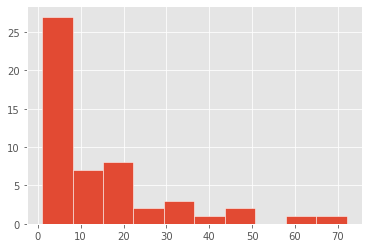

In [166]:
# plot:
fig, ax = plt.subplots()

ax.hist(age_counts, linewidth=0.5, edgecolor="white")

plt.show()

In [167]:
ag_youth = anova_groups[(anova_groups['AgeClass'] == 'Group A') & (anova_groups['Outcome'] == 1.0)][['AgeClass', 'BMI']]
ag_adults = anova_groups[(anova_groups['AgeClass'] == 'Group B') & (anova_groups['Outcome'] == 1.0)][['AgeClass', 'BMI']]
ag_seniors = anova_groups[(anova_groups['AgeClass'] == 'Group C') & (anova_groups['Outcome'] == 1.0)][['AgeClass', 'BMI']]

In [168]:
ag_main = anova_groups[anova_groups['Outcome'] == 1.0][['AgeClass', 'BMI']]

In [169]:
ag_main

AgeClass   BMI
0    Group B  33.6
2    Group A  23.3
4    Group A  43.1
6    Group A  31.0
8    Group B  30.5
..       ...   ...
755  Group A  36.5
757  Group B  36.3
759  Group C  35.5
761  Group A  44.0
766  Group B  30.1

[268 rows x 2 columns]

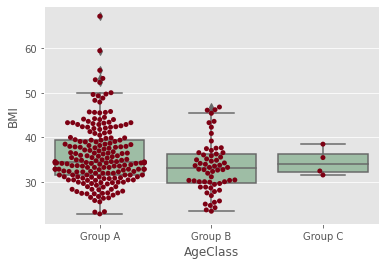

In [170]:
ax = sns.boxplot(x='AgeClass', y='BMI', data=ag_main, color='#99c2a2')
ax = sns.swarmplot(x="AgeClass", y="BMI", data=ag_main, color='#7d0013')
plt.show()

In [171]:
fvalue, pvalue = stats.f_oneway(ag_main[ag_main['AgeClass'] == 'Group A']['BMI'], ag_main[ag_main['AgeClass'] == 'Group B']['BMI'], ag_main[ag_main['AgeClass'] == 'Group C']['BMI'])
print("F-Value: ", fvalue, "P-Value: ", pvalue)

F-Value:  4.027806075088754 P-Value:  0.0189150114587342


In [172]:
model = ols('BMI ~ C(AgeClass)', data=ag_main).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

sum_sq     df         F    PR(>F)
C(AgeClass)    342.169864    2.0  4.027806  0.018915
Residual     11256.129539  265.0       NaN       NaN

In [173]:
res = stat()
res.anova_stat(df=ag_main, res_var='BMI', anova_model='BMI ~ C(AgeClass)')
res.anova_summary

df        sum_sq     mean_sq         F    PR(>F)
C(AgeClass)    2.0    342.169864  171.084932  4.027806  0.018915
Residual     265.0  11256.129539   42.475961       NaN       NaN

In [174]:
stats.f.ppf(q=1-.05, dfn=2, dfd=265)

3.029854654469248

In [175]:
res = stat()
res.tukey_hsd(df=ag_main, res_var='BMI', xfac_var='AgeClass', anova_model='BMI ~ C(AgeClass)')
res.tukey_summary

/Users/brandonlaw/opt/anaconda3/envs/ds/lib/python3.9/site-packages/bioinfokit/analys.py:402: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



group1   group2      Diff     Lower     Upper   q-value   p-value
0  Group B  Group A  2.673475  0.443095  4.903855  3.995665  0.014030
1  Group B  Group C  1.158871 -6.766042  9.083784  0.487453  0.900000
2  Group A  Group C  1.514604 -6.242084  9.271292  0.650900  0.880974

In [176]:
import pingouin as pg

In [177]:
#pairwise comparisons
pt = pg.pairwise_tukey(dv='BMI', between='AgeClass', effsize = 'cohen', data=ag_main)
print(pt)

         A        B    mean(A)    mean(B)      diff        se         T  \
0  Group B  Group A  33.366129  36.039604 -2.673475  0.946242 -2.825362   
1  Group B  Group C  33.366129  34.525000 -1.158871  3.362155 -0.344681   
2  Group A  Group C  36.039604  34.525000  1.514604  3.290785  0.460256   

    p-tukey     cohen  
0  0.014031 -0.410208  
1  0.936629 -0.177813  
2  0.889863  0.232395  


In [178]:
aov = pg.anova(data=ag_main, dv='BMI', between='AgeClass', detailed=True)
print(aov)

     Source            SS   DF          MS         F     p-unc       np2
0  AgeClass    342.169864    2  171.084932  4.027806  0.018915  0.029502
1    Within  11256.129539  265   42.475961       NaN       NaN       NaN


### Post Hoc Tests

In [179]:
x = [ag_main[ag_main['AgeClass'] == 'Group A']['BMI'], ag_main[ag_main['AgeClass'] == 'Group B']['BMI'], ag_main[ag_main['AgeClass'] == 'Group C']['BMI']]
sp.posthoc_dunn(x, p_adjust = 'holm')

1        2    3
1  1.00000  0.02037  1.0
2  0.02037  1.00000  1.0
3  1.00000  1.00000  1.0

In [180]:
ag_main.describe()

BMI
count  268.000000
mean    35.398507
std      6.590852
min     22.900000
25%     30.900000
50%     34.300000
75%     38.775000
max     67.100000

### Multiple Linear Regression

In [181]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    148.0           72.0           35.0    169.5  33.6   
1          1.0     85.0           66.0           29.0    102.5  26.6   
2          8.0    183.0           64.0           32.0    169.5  23.3   
3          1.0     89.0           66.0           23.0     94.0  28.1   
4          0.0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction   Age  Outcome AgeClass  
0                     0.627  50.0      1.0  Group B  
1                     0.351  31.0      0.0  Group A  
2                     0.672  32.0      1.0  Group A  
3                     0.167  21.0      0.0  Group A  
4                     1.949  33.0      1.0  Group A

In [182]:
Xa = df[df['Outcome']==1.0][['Age', 'DiabetesPedigreeFunction', 'Glucose', 'Insulin', 'SkinThickness', 'BloodPressure', 'Pregnancies']]
ya = df[df['Outcome']==1.0]['BMI']

In [183]:
from sklearn.model_selection import train_test_split
Xa_train, Xa_test, ya_train, ya_test = train_test_split(Xa, ya, test_size=0.2, random_state=0)

In [184]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(Xa_train, ya_train)

LinearRegression()

In [185]:
coeff_dfa = pd.DataFrame(regressor.coef_, Xa.columns, columns=['Coefficient'])
coeff_dfa

Coefficient
Age                         -0.142681
DiabetesPedigreeFunction     0.729961
Glucose                     -0.002071
Insulin                      0.000620
SkinThickness                0.355401
BloodPressure                0.158644
Pregnancies                 -0.091229

In [186]:
ya_pred = regressor.predict(Xa_test)

In [187]:
df_testa = pd.DataFrame({'Actual BMI': ya_test, 'Predicted BMI': ya_pred})
df_testa

Actual BMI  Predicted BMI
236        35.9      30.423614
750        31.2      37.037741
207        37.7      37.253551
219        37.8      32.978394
476        33.7      42.161784
406        28.9      33.385815
662        37.6      43.594871
170        30.8      36.100451
24         36.6      35.717783
14         25.8      28.012797
124        33.3      37.599578
755        36.5      40.403067
357        39.9      32.647816
185        35.9      31.875138
676        24.8      33.960452
614        36.1      30.430068
590        46.8      38.045860
293        40.5      37.772514
199        30.9      31.989371
363        38.5      31.382305
255        33.6      37.149627
638        40.9      36.094200
502        39.0      36.685252
659        34.2      38.098486
284        27.0      33.910427
179        39.1      36.557475
322        27.4      30.487750
619        32.4      37.106503
448        33.6      37.738157
655        38.7      31.590591
13         30.1      26.723147
308        30.5      32.212741
155        50.0      41.236980
484        44.2      36.410854
766        30.1      31.570611
408        25.9      34.762091
359        36.5      38.387060
541        32.4      33.812244
61         32.9      33.905021
291        36.6      34.685302
612        38.2      40.344675
100        39.0      36.032520
404        32.9      32.453183
38         38.2      39.343120
675        30.9      34.825607
283        30.4      34.941197
235        43.6      36.198675
332        43.3      34.566320
485        42.3      39.809591
9          34.3      35.561085
43         45.4      35.153048
683        32.3      37.461996
754        32.4      34.083601
19         34.6      34.695092

In [188]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(ya_test, ya_pred))
print('Mean Squared Error:', metrics.mean_squared_error(ya_test, ya_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ya_test, ya_pred)))

Mean Absolute Error: 4.285533980874335
Mean Squared Error: 25.56082173537158
Root Mean Squared Error: 5.055771131624886


In [189]:
regressor.score(Xa_test, ya_test)

0.1343712136648315

In [258]:
Xb = df[df['Outcome']==1.0][['Age', 'Glucose', 'DiabetesPedigreeFunction', 'Insulin', 'SkinThickness', 'BloodPressure', 'Pregnancies']]
yb = df[df['Outcome']==1.0]['BMI']

In [259]:
from sklearn.model_selection import train_test_split
Xb_train, Xb_test, yb_train, yb_test = train_test_split(Xb, yb, test_size=0.2, random_state=0)

In [260]:
X2 = sm.add_constant(Xb_train)
est = sm.OLS(yb_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                    BMI   R-squared:                       0.328
Model:                            OLS   Adj. R-squared:                  0.305
Method:                 Least Squares   F-statistic:                     14.38
Date:                Thu, 07 Apr 2022   Prob (F-statistic):           3.48e-15
Time:                        12:44:51   Log-Likelihood:                -672.46
No. Observations:                 214   AIC:                             1361.
Df Residuals:                     206   BIC:                             1388.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

### Group A

In [193]:
X = df[(df['Outcome']==1.0) & (df['AgeClass']=='Group A')][['Age', 'DiabetesPedigreeFunction', 'Glucose', 'Insulin', 'SkinThickness', 'BloodPressure', 'Pregnancies']]
y = df[(df['Outcome']==1.0) & (df['AgeClass']=='Group A')]['BMI']

In [194]:
#Group A
y.describe()

count    202.000000
mean      36.039604
std        6.777305
min       22.900000
25%       31.600000
50%       34.550000
75%       39.475000
max       67.100000
Name: BMI, dtype: float64

In [195]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [311]:
X = sm.add_constant(X_train)
est = sm.OLS(y_train, X)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                    BMI   R-squared:                       0.387
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                     13.80
Date:                Fri, 08 Apr 2022   Prob (F-statistic):           8.71e-14
Time:                        23:01:40   Log-Likelihood:                -500.79
No. Observations:                 161   AIC:                             1018.
Df Residuals:                     153   BIC:                             1042.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [197]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [198]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

ValueError: Shape of passed values is (7, 1), indices imply (8, 1)

In [199]:
y_pred = regressor.predict(X_test)

In [200]:
df_test = pd.DataFrame({'Actual BMI': y_test, 'Predicted BMI': y_pred})
df_test

Actual BMI  Predicted BMI
64         32.8      33.272042
655        38.7      28.558059
357        39.9      33.006259
323        26.8      38.297737
675        30.9      35.741128
693        38.5      42.108759
16         45.8      43.769591
515        31.6      29.427559
31         31.6      37.770510
561        41.3      35.731641
214        34.2      35.019342
417        38.5      37.077651
683        32.3      35.839752
577        42.9      35.879823
270        45.6      37.860375
19         34.6      34.410321
125        55.0      32.617131
429        35.0      33.343030
132        34.5      36.688409
254        27.6      19.385098
663        37.9      42.522199
506        36.5      37.698895
171        35.4      30.310289
598        36.8      37.079438
213        42.6      32.061373
414        34.6      35.002045
681        49.6      38.726995
706        34.3      33.483700
409        42.4      42.040269
170        30.8      35.403790
56         37.7      37.758796
195        39.4      40.988427
541        32.4      31.555145
370        38.4      43.692765
78         43.2      35.839486
716        33.8      40.385906
427        34.1      34.819520
15         30.0      33.897033
287        45.6      40.317114
356        33.3      35.616470
444        29.7      23.762429

In [201]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.566820204477281
Mean Squared Error: 39.290384543748395
Root Mean Squared Error: 6.268204251916844


### Group B

In [202]:
X1 = df[(df['Outcome']==1.0) & (df['AgeClass']=='Group B')][['Age', 'DiabetesPedigreeFunction', 'Glucose', 'Insulin', 'SkinThickness', 'BloodPressure', 'Pregnancies']]
y1 = df[(df['Outcome']==1.0) & (df['AgeClass']=='Group B')]['BMI']

In [203]:
#Group B
y1.describe()

count    62.000000
mean     33.366129
std       5.717988
min      23.500000
25%      29.775000
50%      33.100000
75%      36.250000
max      46.800000
Name: BMI, dtype: float64

In [204]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=0)

In [205]:
X = sm.add_constant(X1_train)
est = sm.OLS(y1_train, X)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                    BMI   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     2.451
Date:                Wed, 06 Apr 2022   Prob (F-statistic):             0.0339
Time:                        13:39:17   Log-Likelihood:                -138.27
No. Observations:                  49   AIC:                             292.5
Df Residuals:                      41   BIC:                             307.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [206]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X1_train, y1_train)

LinearRegression()

In [207]:
coeff_df1 = pd.DataFrame(regressor.coef_, X1.columns, columns=['Coefficient'])
coeff_df1

Coefficient
Age                         -0.201168
DiabetesPedigreeFunction     4.700650
Glucose                     -0.009228
Insulin                      0.022179
SkinThickness                0.154275
BloodPressure                0.174757
Pregnancies                  0.235902

In [208]:
y1_pred = regressor.predict(X1_test)

In [209]:
df1_test = pd.DataFrame({'Actual BMI': y1_test, 'Predicted BMI': y1_pred})
df1_test

Actual BMI  Predicted BMI
387        43.3      37.570615
406        28.9      31.467252
458        37.6      40.572752
618        28.2      36.641932
689        46.1      34.439500
498        25.1      27.886334
111        34.0      35.809098
590        46.8      39.268588
9          34.3      34.226508
584        28.7      37.703107
319        23.5      28.482326
14         25.8      29.334918
93         23.8      28.010203

In [210]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y1_test, y1_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y1_test, y1_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y1_test, y1_pred)))

Mean Absolute Error: 5.023285437182413
Mean Squared Error: 35.33479977086859
Root Mean Squared Error: 5.944308182696166


### Group C

In [211]:
X2 = df[(df['Outcome']==1.0) & (df['AgeClass']=='Group C')][['Age', 'DiabetesPedigreeFunction', 'Glucose', 'Insulin', 'SkinThickness', 'BloodPressure', 'Pregnancies']]
y2 = df[(df['Outcome']==1.0) & (df['AgeClass']=='Group C')]['BMI']

In [212]:
# Group C
y2.describe()

count     4.000000
mean     34.525000
std       3.130894
min      31.600000
25%      32.275000
50%      34.000000
75%      36.250000
max      38.500000
Name: BMI, dtype: float64

In [213]:
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=0)

In [223]:
X = sm.add_constant(X2_train)
est = sm.OLS(y2_train, X)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                    BMI   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 06 Apr 2022   Prob (F-statistic):                nan
Time:                        13:40:28   Log-Likelihood:                 84.508
No. Observations:                   3   AIC:                            -163.0
Df Residuals:                       0   BIC:                            -165.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Age                     

/Users/brandonlaw/opt/anaconda3/envs/ds/lib/python3.9/site-packages/statsmodels/stats/stattools.py:74: ValueWarning:

omni_normtest is not valid with less than 8 observations; 3 samples were given.

/Users/brandonlaw/opt/anaconda3/envs/ds/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1751: RuntimeWarning:

divide by zero encountered in true_divide

/Users/brandonlaw/opt/anaconda3/envs/ds/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1751: RuntimeWarning:

invalid value encountered in double_scalars

/Users/brandonlaw/opt/anaconda3/envs/ds/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1673: RuntimeWarning:

divide by zero encountered in double_scalars



In [215]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X2_train, y2_train)

LinearRegression()

In [216]:
coeff_df2 = pd.DataFrame(regressor.coef_, X2.columns, columns=['Coefficient'])
coeff_df2


Coefficient
Age                          0.059961
DiabetesPedigreeFunction    -0.031156
Glucose                      0.134659
Insulin                      0.000000
SkinThickness                0.000000
BloodPressure               -0.666140
Pregnancies                  0.226694

In [217]:
y2_pred = regressor.predict(X2_test)

In [218]:
df2_test = pd.DataFrame({'Actual BMI': y2_test, 'Predicted BMI': y2_pred})
df2_test

Actual BMI  Predicted BMI
666        32.5      35.889543

In [219]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y2_test, y2_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y2_test, y2_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y2_test, y2_pred)))

Mean Absolute Error: 3.389542957281286
Mean Squared Error: 11.489001459255165
Root Mean Squared Error: 3.389542957281286


# Final - ANCOVA

In [220]:
import numpy as np
import pandas as pd
from statsmodels.stats.power import TTestIndPower
from scipy.stats import ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
from plotly.graph_objs import *

In [231]:
anc = df
anc.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    148.0           72.0           35.0    169.5  33.6   
1          1.0     85.0           66.0           29.0    102.5  26.6   
2          8.0    183.0           64.0           32.0    169.5  23.3   
3          1.0     89.0           66.0           23.0     94.0  28.1   
4          0.0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction   Age  Outcome AgeClass  
0                     0.627  50.0      1.0  Group B  
1                     0.351  31.0      0.0  Group A  
2                     0.672  32.0      1.0  Group A  
3                     0.167  21.0      0.0  Group A  
4                     1.949  33.0      1.0  Group A

### Defining Blood Pressure categories

In [265]:
bp_class = pd.Series(['LOW', "NE", "HS1", "HS2"], dtype = "category")

anc["BPClass"] = bp_class

anc.loc[anc["BloodPressure"] < 60, "BPClass"] = bp_class[0]
anc.loc[(anc["BloodPressure"] >= 60) & (anc["BloodPressure"] < 80), "BPClass"] = bp_class[1]
anc.loc[(anc["BloodPressure"] >= 80) & (anc["BloodPressure"] <= 89), "BPClass"] = bp_class[2]
anc.loc[(anc["BloodPressure"] >= 90), "BPClass"] = bp_class[3]

In [266]:
anc.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    148.0           72.0           35.0    169.5  33.6   
1          1.0     85.0           66.0           29.0    102.5  26.6   
2          8.0    183.0           64.0           32.0    169.5  23.3   
3          1.0     89.0           66.0           23.0     94.0  28.1   
4          0.0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction   Age  Outcome AgeClass BPClass  
0                     0.627  50.0      1.0  Group B      NE  
1                     0.351  31.0      0.0  Group A      NE  
2                     0.672  32.0      1.0  Group A      NE  
3                     0.167  21.0      0.0  Group A      NE  
4                     1.949  33.0      1.0  Group A     LOW

In [267]:
anc.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.677083      72.389323      29.055990  138.839844   
std       3.369578   30.464161      12.106039       8.671056   75.233052   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      25.000000  102.500000   
50%       3.000000  117.000000      72.000000      28.000000  102.500000   
75%       6.000000  140.250000      80.000000      32.000000  169.500000   
max      17.000000  199.000000     122.000000      73.000000  424.500000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.434635                  0.470082   33.240885    0.348958  
std      6.880498                  0.322171   11.760232    0.476951  
min     18.200000                  0.078000   21.000000    0.000000  
25%     27.500000                  0.243750   24.000000    0.000000  
50%     32.050000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  1.949000   81.000000    1.000000

/Users/brandonlaw/opt/anaconda3/envs/ds/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning:

46.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



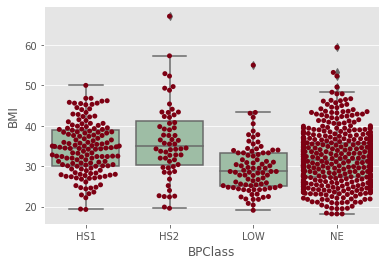

In [268]:
ax = sns.boxplot(x='BPClass', y='BMI', data=anc, color='#99c2a2')
ax = sns.swarmplot(x="BPClass", y="BMI", data=anc, color='#7d0013')
plt.show()

### ANCOVA

In [283]:
import pingouin as pg
from pingouin import ancova

In [277]:
anc_df = anc[['BMI', 'BPClass', 'Age']]

In [298]:
anc_df.head()

BMI BPClass   Age
0  33.6      NE  50.0
1  26.6      NE  31.0
2  23.3      NE  32.0
3  28.1      NE  21.0
4  43.1     LOW  33.0

### Mean and Standard Deviation

In [303]:
anc[anc['BPClass'] == 'LOW'].describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count    86.000000   86.000000      86.000000      86.000000   86.000000   
mean      2.383721  112.023256      52.162791      25.616279  124.197674   
std       1.989198   27.072442       6.471404       8.815986   77.777332   
min       0.000000   56.000000      24.000000      10.000000   16.000000   
25%       1.000000   93.500000      50.000000      19.000000   85.250000   
50%       2.000000  107.000000      54.000000      27.000000  102.500000   
75%       3.000000  125.000000      56.000000      32.000000  158.000000   
max       9.000000  193.000000      58.000000      47.000000  424.500000   

             BMI  DiabetesPedigreeFunction        Age    Outcome  
count  86.000000                 86.000000  86.000000  86.000000  
mean   29.531395                  0.505709  26.697674   0.186047  
std     6.042949                  0.356916   7.832166   0.391427  
min    19.100000                  0.078000  21.000000   0.000000  
25%    25.125000                  0.255000  22.000000   0.000000  
50%    28.700000                  0.424000  24.000000   0.000000  
75%    33.300000                  0.648250  27.750000   0.000000  
max    55.000000                  1.949000  65.000000   1.000000

In [304]:
anc[anc['BPClass'] == 'NE'].describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   477.000000  477.000000     477.000000     477.000000  477.000000   
mean      3.844864  120.113208      69.681342      28.840671  136.407757   
std       3.349564   30.933579       5.444055       8.327071   72.572138   
min       0.000000   44.000000      60.000000       7.000000   14.000000   
25%       1.000000   97.000000      65.000000      25.000000  102.500000   
50%       3.000000  114.000000      70.000000      27.000000  102.500000   
75%       6.000000  138.000000      74.000000      32.000000  169.500000   
max      17.000000  199.000000      78.000000      73.000000  424.500000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  477.000000                477.000000  477.000000  477.000000  
mean    31.876730                  0.453736   32.545073    0.339623  
std      6.491768                  0.308504   11.131404    0.474078  
min     18.200000                  0.085000   21.000000    0.000000  
25%     27.300000                  0.238000   24.000000    0.000000  
50%     31.600000                  0.368000   29.000000    0.000000  
75%     35.800000                  0.591000   39.000000    1.000000  
max     59.400000                  1.949000   81.000000    1.000000

In [305]:
anc[anc['BPClass'] == 'HS1'].describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   145.000000  145.000000     145.000000     145.000000  145.000000   
mean      4.324138  126.786207      83.503448      30.882759  152.168966   
std       3.666445   28.140320       2.903839       9.214650   79.611518   
min       0.000000   57.000000      80.000000      11.000000   36.000000   
25%       1.000000  107.000000      80.000000      27.000000  102.500000   
50%       4.000000  127.000000      84.000000      31.000000  130.000000   
75%       7.000000  144.000000      86.000000      37.000000  169.500000   
max      13.000000  194.000000      88.000000      60.000000  424.500000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  145.000000                145.000000  145.000000  145.000000  
mean    34.470345                  0.516510   36.703448    0.420690  
std      6.334124                  0.349885   13.001669    0.495381  
min     19.300000                  0.084000   21.000000    0.000000  
25%     30.100000                  0.249000   26.000000    0.000000  
50%     34.500000                  0.395000   34.000000    0.000000  
75%     38.900000                  0.704000   46.000000    1.000000  
max     50.000000                  1.949000   70.000000    1.000000

In [322]:
anc[anc['BPClass'] == 'HS2'].describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count    60.000000   60.000000      60.000000      60.000000   60.000000   
mean      4.783333  135.600000      96.050000      31.283333  146.950000   
std       3.742073   30.649025       7.529434       8.242288   77.726471   
min       0.000000   68.000000      90.000000       7.000000   29.000000   
25%       1.000000  114.000000      90.000000      27.000000  102.500000   
50%       5.000000  129.500000      93.000000      32.000000  116.250000   
75%       7.000000  158.000000     100.000000      35.000000  169.500000   
max      13.000000  196.000000     122.000000      51.000000  424.500000   

             BMI  DiabetesPedigreeFunction        Age    Outcome  
count  60.000000                 60.000000  60.000000  60.000000  
mean   36.111667                  0.436767  39.783333   0.483333  
std     9.282535                  0.297869  12.569929   0.503939  
min    19.600000                  0.128000  21.000000   0.000000  
25%    30.275000                  0.233500  28.750000   0.000000  
50%    35.000000                  0.313500  40.000000   0.000000  
75%    41.125000                  0.582250  47.250000   1.000000  
max    67.100000                  1.461000  66.000000   1.000000

In [279]:
# Assumption of homogeniety of regression slopes - there is no interaction. 
model = ols('BMI ~ C(Age) + C(BPClass) + C(Age):C(BPClass)', data=anc_df).fit()
anova_table = sm.stats.anova_lm(model, type=3)
anova_table

df        sum_sq     mean_sq          F        PR(>F)
C(Age)              51.0   3481.514243   68.264985   1.649598  3.865896e-03
C(BPClass)           3.0   2009.682363  669.894121  16.187746  3.852369e-10
C(Age):C(BPClass)  153.0   7543.417719   49.303384   1.191398  7.778207e-02
Residual           619.0  25615.948213   41.382792        NaN           NaN

In [280]:
#perform ANCOVA
ancova(data=anc_df, dv='BMI', covar='Age', between='BPClass')

Source            SS   DF          F         p-unc       np2
0   BPClass   2324.074389    3  17.406232  6.123570e-11  0.064055
1       Age     66.758557    1   1.499971  2.210538e-01  0.001962
2  Residual  33958.502690  763        NaN           NaN       NaN

In [ ]:
from sklearn.model_selection import train_test_split
X2 = anc_df[(anc_df['Outcome']==1.0) & (anc_df['BPClass']=='Group C')][['Age', 'DiabetesPedigreeFunction', 'Glucose', 'Insulin', 'SkinThickness', 'BloodPressure', 'Pregnancies']]
y2 = anc_df[(anc_df['Outcome']==1.0) & (anc_df['BPClass']=='Group C')]['BMI']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=0)

In [ ]:
X = sm.add_constant(X2_train)
est = sm.OLS(y2_train, X)
est2 = est.fit()
print(est2.summary())

/Users/brandonlaw/opt/anaconda3/envs/ds/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



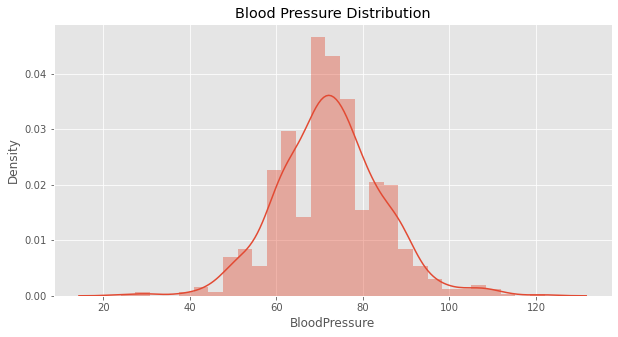

In [272]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.title('Blood Pressure Distribution')
sns.distplot(anc['BloodPressure'])
plt.show()

### Post Hoc

In [309]:
pt = pg.pairwise_tukey(dv='BMI', between='BPClass', data = anc_df, effsize = 'cohen')

# pt = pg.pairwise_tukey(data=anc_df, dv=anc_df['BMI'], between=anc_df['BPClass'], effsize='cohen')

In [312]:
posthoc = pg.pairwise_ttests(data=anc_df, dv='BMI', between='BPClass', parametric=True, padjust='fdr_bh', effsize='eta-square')

In [313]:
print(posthoc)

  Contrast    A    B  Paired  Parametric         T         dof alternative  \
0  BPClass   NE  LOW   False        True  3.274606  123.100012   two-sided   
1  BPClass   NE  HS2   False        True -3.429980   66.451649   two-sided   
2  BPClass   NE  HS1   False        True -4.292702  243.141272   two-sided   
3  BPClass  LOW  HS2   False        True -4.823968   93.381283   two-sided   
4  BPClass  LOW  HS1   False        True -5.897631  185.401088   two-sided   
5  BPClass  HS2  HS1   False        True  1.254128   82.668405   two-sided   

          p-unc        p-corr p-adjust       BF10  eta-square  
0  1.374208e-03  1.649049e-03   fdr_bh     20.817    0.032231  
1  1.041746e-03  1.562619e-03   fdr_bh     36.605    0.087093  
2  2.550984e-05  5.101968e-05   fdr_bh     714.94    0.038789  
3  5.459839e-06  1.637952e-05   fdr_bh   4393.857    0.159934  
4  1.715195e-08  1.029117e-07   fdr_bh  7.896e+05    0.135875  
5  2.133301e-01  2.133301e-01   fdr_bh      0.344    0.012431  


In [314]:
import statsmodels as sm

In [317]:
print(pg.pairwise_tukey(dv='BMI', between='BPClass', data = anc_df, effsize = 'eta-square'))

print(sm.stats.multicomp.pairwise_tukeyhsd(anc_df['BMI'], anc_df['BPClass'], alpha = 0.05)) 

     A    B    mean(A)    mean(B)      diff        se         T       p-tukey  \
0   NE  LOW  31.876730  29.531395  2.345334  0.781808  2.999887  1.477839e-02   
1   NE  HS2  31.876730  36.111667 -4.234937  0.914127 -4.632768  2.512996e-05   
2   NE  HS1  31.876730  34.470345 -2.593615  0.632858 -4.098260  2.687434e-04   
3  LOW  HS2  29.531395  36.111667 -6.580271  1.122550 -5.861897  4.077438e-08   
4  LOW  HS1  29.531395  34.470345 -4.938949  0.908295 -5.437606  4.349482e-07   
5  HS2  HS1  36.111667  34.470345  1.641322  1.024404  1.602221  3.779345e-01   

   eta-square  
0    0.029953  
1    0.091467  
2    0.036387  
3    0.195536  
4    0.120439  
5    0.014897  
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   HS1    HS2   1.6413 0.3789 -0.9962  4.2789  False
   HS1    LOW  -4.9389  0.001 -7.2776 -2.6003   True
   HS1     NE  -2.5936  0.001 -4.2231 -0.9642   True
  

### Power

In [353]:
effect_size = 0.8 #medium effect size
alpha = 0.05 #confidence 95%
power = 0.8 #power 80%
power_analysis = TTestIndPower()
sample_size = power_analysis.solve_power(effect_size = effect_size,
 power = power,
 alpha = alpha)
print('Sample Size required: {0:.2f}'.format(sample_size))

Sample Size required: 25.52


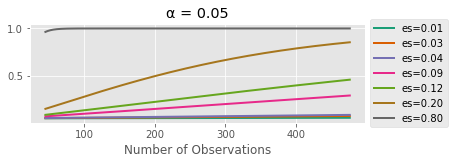

In [355]:
# viz of power
fig = plt.figure()
ax = fig.add_subplot(2,1,1)
fig = TTestIndPower().plot_power(dep_var = 'nobs',
    nobs = np.arange(45,477),
    effect_size=np.array([0.014897, 0.029953, 0.036387, 0.091467,  0.120439, 0.195536, 0.8]),
    alpha=0.05,
    ax=ax, title="α = 0.05")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

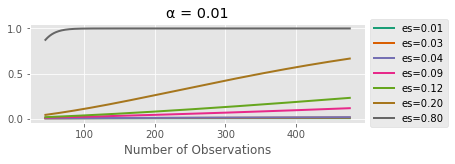

In [356]:
# viz of power
fig = plt.figure()
ax = fig.add_subplot(2,1,1)
fig = TTestIndPower().plot_power(dep_var = 'nobs',
    nobs = np.arange(45,477),
    effect_size=np.array([0.014897, 0.029953, 0.036387, 0.091467,  0.120439, 0.195536, 0.8]),
    alpha=0.01,
    ax=ax, title="α = 0.01")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [330]:
ax = fig.add_subplot(2,1,2)
fig = TTestIndPower().plot_power(dep_var = 'nobs',
    nobs = np.arange(2,200),
    effect_size=np.array([0.2, 0.5, 0.8]),
    alpha=0.05,
    ax=ax, title="95% universe")
fig.subplots_adjust(top=1.5)